<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/vasco/niki_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [12]:
import scipy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import scipy.io
import os
from IPython.display import Audio

In [3]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal =  '/content/drive/MyDrive/signal processing/males/'


fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([fem+x for x in os.listdir(mal)])

In [4]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data

<ipython-input-4-0ce80641c6ae>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data


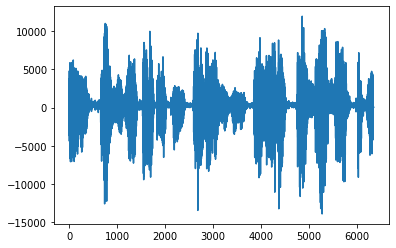

In [11]:
sns.lineplot(data = faudios[0][1][0::10])
Audio(fems[0])

In [10]:
fems[0]

'/content/drive/MyDrive/signal processing/females/5c9167fa-9dee-4d42-9cf3-a35d875f43a0.wav'

In [21]:
import scipy.stats as stats
from scipy.fft import fft, fftfreq

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

def features_extraction(X): 
    
    
    Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
    FormFactor=[]; PulseIndicator=[];
    Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
    
    ## TIME DOMAIN ##

    Min.append(np.min(X))
    Max.append(np.max(X))
    Mean.append(np.mean(X))
    Rms.append(np.sqrt(np.mean(X**2)))
    Var.append(np.var(X))
    Std.append(np.std(X))
    Power.append(np.mean(X**2))
    Peak.append(np.max(np.abs(X)))
    P2p.append(np.ptp(X))
    CrestFactor.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
    Skew.append(stats.skew(X))
    Kurtosis.append(stats.kurtosis(X))
    FormFactor.append(np.sqrt(np.mean(X**2))/np.mean(X))
    PulseIndicator.append(np.max(np.abs(X))/np.mean(X))

    ## FREQ DOMAIN ##
    ft = fft(X)
    S = np.abs(ft**2)/len(X)
    Max_f.append(np.max(S))
    Sum_f.append(np.sum(S))
    Mean_f.append(np.mean(S))
    Var_f.append(np.var(S))
    
    Peak_f.append(np.max(np.abs(S)))
    Skew_f.append(stats.skew(X))
    Kurtosis_f.append(stats.kurtosis(X))
    #Create dataframe from features
    df_features = pd.DataFrame(index = [FEATURES], 
                               data = [Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,
                                       Max_f,Sum_f,Mean_f,Var_f,Peak_f,Skew_f,Kurtosis_f])
    return df_features

In [24]:
audio1 = faudios[0][1]
features_extraction(audio1)

,0
MIN,-1.612300e+04
MAX,1.546500e+04
MEAN,3.206800e+02
RMS,2.071096e+01
VAR,7.858829e+06
STD,2.803360e+03
POWER,4.289437e+02
PEAK,1.612300e+04
P2P,3.158800e+04
CREST FACTOR,7.784769e+02
